# WeatherPy
----

#### Observations
* 1. There is a strong correlation between latitude and max temp for both hemispheres. Northern hemisphere gets colder the further north you go from he equator while the southern hemisphere gets colder the further south you go from the equator.
* 2. The vast majority of locations have a humidity percentage of over 50%. This has little to no reliance on latitude. 
* 3. The vast majority of locations have a wind speed of 15mph or less. This also has little to no reliance on latitude.
* 4. Cloudiness is completely unaffected by the latitude of a location. 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporate citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500) #size should be 1500 in this and below
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If statement that determines if the city is unique, then adds it to a our cities list (only if unique)
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

630

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#empty lists to store info
usedLats=[]
usedLngs=[]
maxTemp=[]
humidity=[]
cloudiness=[]
windSpeed=[]
country=[]
date=[]
usedCities=[]

# Set up API call information
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="


print("Beginning Data Retrieval")
print("-------------------------------")

#iterate through each city
for city in cities:
    
    #send the request
    response = requests.get(query_url + city).json()
    
    #track record number
    recordNum=cities.index(city)+1  
    
    try: 
        #append info to corresponding list above
        usedLats.append(response['coord']['lat'])
        usedLngs.append(response['coord']['lon'])
        maxTemp.append(response['main']['temp_max'])     
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        windSpeed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        usedCities.append(city)
        
        #print to make it known it was successful
        print(f"Processing Record {recordNum} of Set 1 | {city}")
        
    except:
        #if unable to retrieve some info, show skipping message
        print(f"The city, {city}, was not found. Skipping...")    
        


Beginning Data Retrieval
-------------------------------
The city, karamay, was not found. Skipping...
Processing Record 2 of Set 1 | rikitea
Processing Record 3 of Set 1 | saint anthony
Processing Record 4 of Set 1 | acarau
Processing Record 5 of Set 1 | norman wells
Processing Record 6 of Set 1 | husavik
Processing Record 7 of Set 1 | kapaa
Processing Record 8 of Set 1 | zhireken
Processing Record 9 of Set 1 | lakselv
Processing Record 10 of Set 1 | punta arenas
Processing Record 11 of Set 1 | awbari
Processing Record 12 of Set 1 | hilo
Processing Record 13 of Set 1 | butaritari
Processing Record 14 of Set 1 | hambantota
Processing Record 15 of Set 1 | port alfred
The city, belushya guba, was not found. Skipping...
Processing Record 17 of Set 1 | goderich
Processing Record 18 of Set 1 | castro
The city, sentyabrskiy, was not found. Skipping...
Processing Record 20 of Set 1 | vermilion
Processing Record 21 of Set 1 | cape town
The city, attawapiskat, was not found. Skipping...
Process

Processing Record 193 of Set 1 | moron
The city, nizhneyansk, was not found. Skipping...
Processing Record 195 of Set 1 | ribeira grande
Processing Record 196 of Set 1 | kawalu
Processing Record 197 of Set 1 | kahului
Processing Record 198 of Set 1 | faanui
Processing Record 199 of Set 1 | tadine
Processing Record 200 of Set 1 | toba
Processing Record 201 of Set 1 | asfi
Processing Record 202 of Set 1 | nikolskoye
Processing Record 203 of Set 1 | mogadishu
Processing Record 204 of Set 1 | sumenep
Processing Record 205 of Set 1 | emmen
Processing Record 206 of Set 1 | newport
Processing Record 207 of Set 1 | tilichiki
The city, meyungs, was not found. Skipping...
Processing Record 209 of Set 1 | maceio
Processing Record 210 of Set 1 | south venice
The city, kazalinsk, was not found. Skipping...
Processing Record 212 of Set 1 | araouane
Processing Record 213 of Set 1 | dusnok
Processing Record 214 of Set 1 | zinacantan
Processing Record 215 of Set 1 | carnarvon
Processing Record 216 of S

Processing Record 386 of Set 1 | acapulco
Processing Record 387 of Set 1 | teya
Processing Record 388 of Set 1 | lorengau
Processing Record 389 of Set 1 | saint-donat-de-montcalm
Processing Record 390 of Set 1 | sar-e pul
Processing Record 391 of Set 1 | shambu
Processing Record 392 of Set 1 | hay river
Processing Record 393 of Set 1 | luncarty
Processing Record 394 of Set 1 | deputatskiy
Processing Record 395 of Set 1 | loukhi
The city, labutta, was not found. Skipping...
The city, samusu, was not found. Skipping...
Processing Record 398 of Set 1 | tornio
Processing Record 399 of Set 1 | chute-aux-outardes
Processing Record 400 of Set 1 | okato
Processing Record 401 of Set 1 | gamba
Processing Record 402 of Set 1 | isiro
Processing Record 403 of Set 1 | fairlie
Processing Record 404 of Set 1 | grimshaw
Processing Record 405 of Set 1 | manado
Processing Record 406 of Set 1 | nome
Processing Record 407 of Set 1 | rocha
Processing Record 408 of Set 1 | puerto leguizamo
Processing Record 

Processing Record 579 of Set 1 | male
Processing Record 580 of Set 1 | ilebo
Processing Record 581 of Set 1 | great falls
Processing Record 582 of Set 1 | san policarpo
Processing Record 583 of Set 1 | puerto del rosario
Processing Record 584 of Set 1 | xining
Processing Record 585 of Set 1 | hengshui
Processing Record 586 of Set 1 | svalyava
The city, alotau, was not found. Skipping...
Processing Record 588 of Set 1 | kantang
Processing Record 589 of Set 1 | chipata
Processing Record 590 of Set 1 | ayan
Processing Record 591 of Set 1 | coari
Processing Record 592 of Set 1 | yar-sale
Processing Record 593 of Set 1 | tamboril
Processing Record 594 of Set 1 | paamiut
Processing Record 595 of Set 1 | oranjestad
Processing Record 596 of Set 1 | katsuura
Processing Record 597 of Set 1 | kondinskoye
The city, palabuhanratu, was not found. Skipping...
Processing Record 599 of Set 1 | los llanos de aridane
Processing Record 600 of Set 1 | mae sai
The city, galiwinku, was not found. Skipping...

### Convert Raw Data to DataFrame
* Export the city data into a .csv
* Display the DataFrame

In [4]:
#create data frame
weatherPy=pd.DataFrame({"City":usedCities,"Lat":usedLats,"Lng":usedLngs,"Max Temp":maxTemp,"Humidity":humidity,"Cloudiness":cloudiness,"Wind Speed":windSpeed,"Country":country,"Date":date})

#export to a CSV file
weatherPy.to_csv("Weather_Data.csv", encoding="utf-8", index=False)

#display first 5 in data frame
weatherPy.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,rikitea,-23.1203,-134.9692,71.01,67,19,4.70,PF,1627250911
1,saint anthony,45.0205,-93.2180,94.14,24,1,11.50,US,1627250912
2,acarau,-2.8856,-40.1200,78.55,75,15,15.55,BR,1627250912
3,norman wells,65.2820,-126.8329,68.31,57,87,15.39,CA,1627250913
4,husavik,66.0449,-17.3389,56.23,63,92,14.85,IS,1627250913


In [5]:
#show all stats available for data frame
weatherPy.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,585.000000,585.000000,585.000000,585.000000,585.000000,585.000000,5.850000e+02
mean,20.217172,15.351052,68.829744,70.769231,52.652991,7.469350,1.627251e+09
std,33.361532,88.536293,14.627613,20.980415,38.650005,5.163659,9.698049e+01
min,-54.800000,-179.166700,33.460000,5.000000,0.000000,0.000000,1.627250e+09
25%,-7.381700,-63.141400,56.300000,60.000000,12.000000,3.580000,1.627251e+09
50%,22.678300,23.041200,70.050000,76.000000,56.000000,6.110000,1.627251e+09
75%,49.116800,88.397200,80.060000,87.000000,90.000000,10.360000,1.627251e+09
max,78.218600,179.316700,108.010000,100.000000,100.000000,27.850000,1.627251e+09


## Inspect the data and remove the cities where the humidity > 100%.
----


In [6]:
#upload from the CSV file
weatherPyCSV=pd.read_csv('Weather_Data.csv')

#sort value by humidity %
weatherPyCSV=weatherPyCSV.sort_values("Humidity", ascending=False).reset_index()
weatherPyCSV.head()

,index,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,192,maceio,-9.6658,-35.7353,72.84,100,75,4.61,BR,1627250939
1,30,clyde river,70.4692,-68.5914,35.83,100,90,5.75,CA,1627250925
2,364,chute-aux-outardes,49.1168,-68.3990,66.51,100,90,8.05,CA,1627251080
3,550,tamboril,19.4854,-70.6110,82.89,100,75,9.22,DO,1627251167
4,556,mae sai,20.4335,99.8762,74.44,100,100,0.69,TH,1627251014


In [7]:
#  Get the indices of cities that have humidity over 100%.
HumidityIndices=weatherPyCSV['City'].where(weatherPyCSV['Humidity'] > 100).to_frame(name='Humidity > 100')

indexList=HumidityIndices.index[HumidityIndices['Humidity > 100'].notnull()].tolist()


In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
if len(indexList)!=0:
    print(f"There are columns to drop: {indexList}")
    for x in indexList:
        cleanWeatherPy=WeatherPyCSV.drop(indexList , inplace=False)
else:
    print("There are no columns to drop")

There are no columns to drop


In [9]:
#display cleaned data
weatherPyCSV.head()

,index,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,192,maceio,-9.6658,-35.7353,72.84,100,75,4.61,BR,1627250939
1,30,clyde river,70.4692,-68.5914,35.83,100,90,5.75,CA,1627250925
2,364,chute-aux-outardes,49.1168,-68.3990,66.51,100,90,8.05,CA,1627251080
3,550,tamboril,19.4854,-70.6110,82.89,100,75,9.22,DO,1627251167
4,556,mae sai,20.4335,99.8762,74.44,100,100,0.69,TH,1627251014


# Plotting the Data

## Latitude vs. Temperature Plot

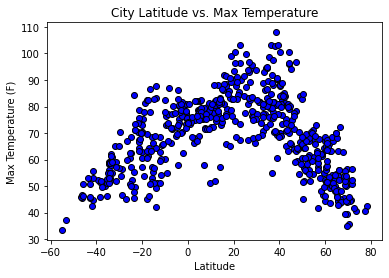

In [25]:
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.scatter(weatherPyCSV["Lat"], weatherPyCSV["Max Temp"], marker="o", facecolors="blue", edgecolors="black")
plt.savefig('latVtemp.png', dpi=150, bbox_inches='tight')

#### The above scatter plot shows latitude in relation to the location's Max temperature. We can see that the northern hemisphere
#### (to the right of 0 on the latitude line) gets colder the futher north you get. Conversely, the southern hemisphere gets
#### colder the further south you get from the equator.

## Latitude vs. Humidity Plot

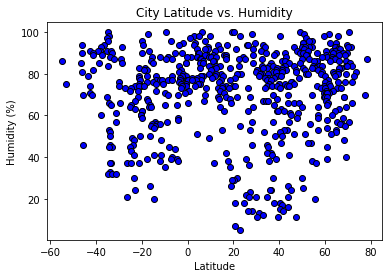

In [26]:
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.scatter(weatherPyCSV["Lat"], weatherPyCSV["Humidity"], marker="o", facecolors="blue", edgecolors="black")
plt.savefig('latVhumidity.png', dpi=150, bbox_inches='tight')

#### The above scatter plot shows latitude in relation to the location's humidity. There's little correlation, but there does seem
#### to be many (visually more than 3/4of the data set) that have humidity higher than 50%. These locations are spread fairly evenly
#### between the northern and southern hemispheres.

## Latitude vs. Cloudiness Plot

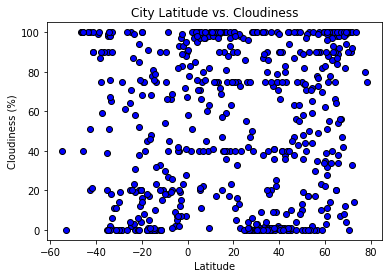

In [27]:
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.scatter(weatherPyCSV["Lat"], weatherPyCSV["Cloudiness"], marker="o", facecolors="blue", edgecolors="black")
plt.savefig('latVcloudiness.png', dpi=150, bbox_inches='tight')

#### The above scatter plot show latitude in relation to cloudiness. There seems to be absolutely no relation between a location
#### and the amount of cloudiness it received.

## Latitude vs. Wind Speed Plot

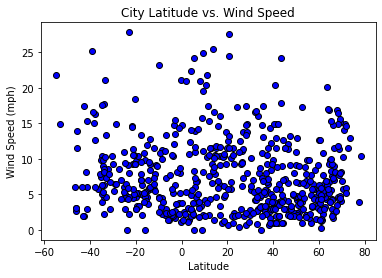

In [28]:
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.scatter(weatherPyCSV["Lat"], weatherPyCSV["Wind Speed"], marker="o", facecolors="blue", edgecolors="black")
plt.savefig('latVwind.png', dpi=150, bbox_inches='tight')

#### The above scatter plot shows latitude in relation to the locations wind speed (mph). There doesn't seem to be much relation
#### for wind speed compared to location, however, visually it seems that more than 3/4 of the locations experience wind speeds of
#### 15mph or less.

# Linear Regression

In [14]:
northernDF=weatherPyCSV[weatherPyCSV["Lat"]>=0]
southernDF=weatherPyCSV[weatherPyCSV["Lat"]<=0]

##  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.6435352640256061


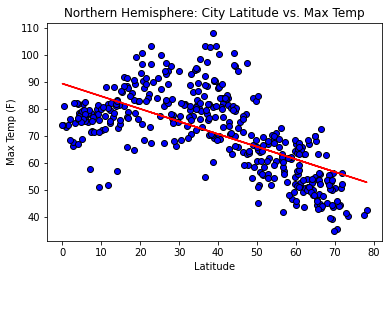

<Figure size 432x288 with 0 Axes>

In [29]:
plt.title("Northern Hemisphere: City Latitude vs. Max Temp")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
(slope, intercept, rvalue, pvalue, stderr) = linregress(northernDF["Lat"], northernDF["Max Temp"])
print(f"The r-value is: {rvalue}")
regress_values = northernDF["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(northernDF["Lat"], northernDF["Max Temp"], marker="o", facecolors="blue", edgecolors="black")
plt.plot(northernDF["Lat"],regress_values,"r-")
plt.annotate(line_eq,(10,0),fontsize=15,color="red")
plt.show()
plt.savefig('NHlatVtemp.png', dpi=150, bbox_inches='tight')

##  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7040997595627262


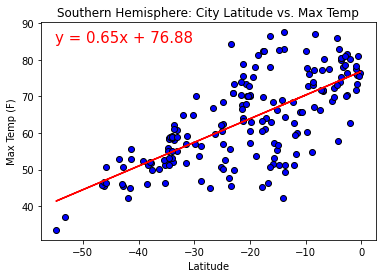

<Figure size 432x288 with 0 Axes>

In [30]:
plt.title("Southern Hemisphere: City Latitude vs. Max Temp")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
(slope, intercept, rvalue, pvalue, stderr) = linregress(southernDF["Lat"], southernDF["Max Temp"])
print(f"The r-value is: {rvalue}")
regress_values = southernDF["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(southernDF["Lat"], southernDF["Max Temp"], marker="o", facecolors="blue", edgecolors="black")
plt.plot(southernDF["Lat"],regress_values,"r-")
plt.annotate(line_eq,(-55,85),fontsize=15,color="red")
plt.show()
plt.savefig('SHlatVtemp.png', dpi=150, bbox_inches='tight')

#### The above two scatter plots show the norther and southern hemispheres, respectively, compared to the max temp in each location.
#### There is a relatively strong relation for each hemisphere and it's max temps, where northern hemisphere locations get colder
#### further north, while the southern hemisphere has colder temps further south.

##  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.0029504885477440114


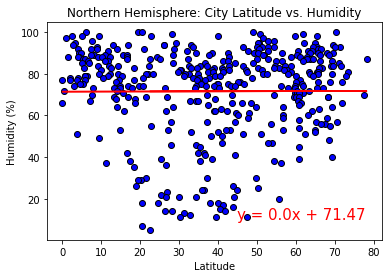

<Figure size 432x288 with 0 Axes>

In [31]:
plt.title("Northern Hemisphere: City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
(slope, intercept, rvalue, pvalue, stderr) = linregress(northernDF["Lat"], northernDF["Humidity"])
print(f"The r-value is: {rvalue}")
regress_values = northernDF["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(northernDF["Lat"], northernDF["Humidity"], marker="o", facecolors="blue", edgecolors="black")
plt.plot(northernDF["Lat"],regress_values,"r-")
plt.annotate(line_eq,(45,10),fontsize=15,color="red")
plt.show()
plt.savefig('NHlatVhumidity.png', dpi=150, bbox_inches='tight')

##  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: -0.02965314919222938


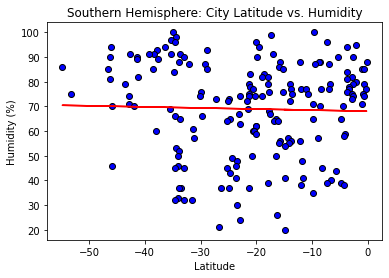

<Figure size 432x288 with 0 Axes>

In [32]:
plt.title("Southern Hemisphere: City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
(slope, intercept, rvalue, pvalue, stderr) = linregress(southernDF["Lat"], southernDF["Humidity"])
print(f"The r-value is: {rvalue}")
regress_values = southernDF["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(southernDF["Lat"], southernDF["Humidity"], marker="o", facecolors="blue", edgecolors="black")
plt.plot(southernDF["Lat"],regress_values,"r-")
plt.annotate(line_eq,(-55,15),fontsize=15,color="red")
plt.show()
plt.savefig('SHlatVhumidity.png', dpi=150, bbox_inches='tight')

#### The above two scatter plots show latitude vs humidity for both the northern and southern hemispheres. Neither hemisphere has
#### a strong relation between the two, however, the southern hemisphere has  the vast majority of cities with humidity over 50%
#### while the norther hemisphere has a lot more occurences of cities with humidity below 50% (however, the vast majority of  
#### cities still have humidity over 50%).
 

##  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: -0.029799089576623954


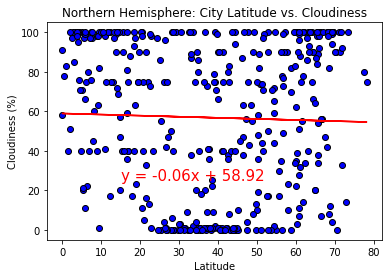

<Figure size 432x288 with 0 Axes>

In [33]:
plt.title("Northern Hemisphere: City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
(slope, intercept, rvalue, pvalue, stderr) = linregress(northernDF["Lat"], northernDF["Cloudiness"])
print(f"The r-value is: {rvalue}")
regress_values = northernDF["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(northernDF["Lat"], northernDF["Cloudiness"], marker="o", facecolors="blue", edgecolors="black")
plt.plot(northernDF["Lat"],regress_values,"r-")
plt.annotate(line_eq,(15,25),fontsize=15,color="red")
plt.show()
plt.savefig('NHlatVcloudiness.png', dpi=150, bbox_inches='tight')

##  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: -0.18668471475774995


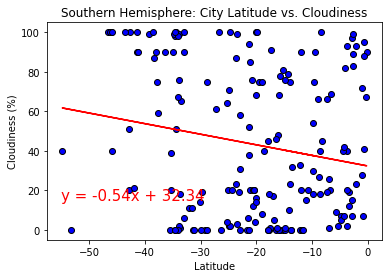

<Figure size 432x288 with 0 Axes>

In [34]:
plt.title("Southern Hemisphere: City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
(slope, intercept, rvalue, pvalue, stderr) = linregress(southernDF["Lat"], southernDF["Cloudiness"])
print(f"The r-value is: {rvalue}")
regress_values = southernDF["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(southernDF["Lat"], southernDF["Cloudiness"], marker="o", facecolors="blue", edgecolors="black")
plt.plot(southernDF["Lat"],regress_values,"r-")
plt.annotate(line_eq,(-55,15),fontsize=15,color="red")
plt.show()
plt.savefig('SHlatVcloudiness.png', dpi=150, bbox_inches='tight')

#### The above two scatter plots show the relation between latitude and cloudiness for both the northern and southern hemispheres.
#### There is little to no relationship between these two variables. The number of places with cloudiness greater than 50% seems 
#### to be balanced with the number of places with cloudiness less than 50%, and both are spread evenly over all latitudes.

##  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.12089706173953225


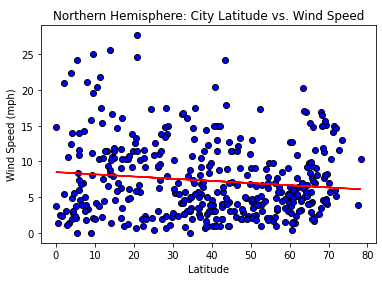

<Figure size 432x288 with 0 Axes>

In [35]:
plt.title("Northern Hemisphere: City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
(slope, intercept, rvalue, pvalue, stderr) = linregress(northernDF["Lat"], northernDF["Wind Speed"])
print(f"The r-value is: {rvalue}")
regress_values = northernDF["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(northernDF["Lat"], northernDF["Wind Speed"], marker="o", facecolors="blue", edgecolors="black")
plt.plot(northernDF["Lat"],regress_values,"r-")
plt.annotate(line_eq,(48,30),fontsize=15,color="red")
plt.show()
plt.savefig('NHlatVwind.png', dpi=150, bbox_inches='tight')

##  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.20425183257510382


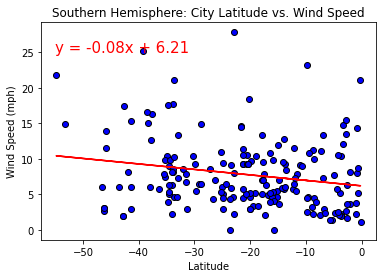

<Figure size 432x288 with 0 Axes>

In [36]:
plt.title("Southern Hemisphere: City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
(slope, intercept, rvalue, pvalue, stderr) = linregress(southernDF["Lat"], southernDF["Wind Speed"])
print(f"The r-value is: {rvalue}")
regress_values = southernDF["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(southernDF["Lat"], southernDF["Wind Speed"], marker="o", facecolors="blue", edgecolors="black")
plt.plot(southernDF["Lat"],regress_values,"r-")
plt.annotate(line_eq,(-55,25),fontsize=15,color="red")
plt.show()
plt.savefig('SHlatVwind.png', dpi=150, bbox_inches='tight')

#### The above two scatter plots show the relationship between latitude and wind speed for the nothern and southern hemispheres.
#### There doesn't seem to be a huge relation between the two for the northern or southern hemispheres, however but have a majority
#### of locations with wind speed of 15mph or less. 